## Data

### Authors
- Brett Kinsella - Data Pipeline & Cleaning, Exploratory Data Analysis 


### Data Overview
Dataset Name: Police Calls for Service 2025
- Link to dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 466979
- Number of variables: 14
- Description of variables: 

    | Variable | Description |
    |----------|-------------|
    | INCIDENT_NUM  | Unique incident number identifier |
    | DATE_TIME  | Recorded date and time of incident |
    | DAY_OF_WEEK  | Day of the week incident occurred  |
    | ADDRESS_NUMBER_PRIMARY  | Primary address number |
    | ADDRESS_DIR_PRIMARY  | Primary address direction |
    | ADDRESS_ROAD_PRIMARY  | Primary address street name |
    | ADDRESS_SFX_PRIMARY  | Primary address suffix |
    | ADDRESS_DIR_INTERSECTING  | Intersecting address direction |
    | ADDRESS_ROAD_INTERSECTING  | Intersecting address street name |
    | ADDRESS_SFX_INTERSECTING  | Intersecting address suffix |
    | CALL_TYPE  |  Code corresponding to type of incident |
    | DISPOSITION  | Code corresponding to outcome or resolution of the incident |
    | BEAT  | Geographic patrol zone or district number that the incident originated from |
    | PRIORITY  | Urgency level assigned to the incident |

- Descriptions of any shortcomings: There are large amounts of missing fields in the primary address suffix column and primary address direction column.  This is likely due to many streets not having a suffix or direction, but this may cause complications for data analysis as entries with missing fields don't necessarily correlate to data that can be thrown out.  An even more extreme version of this can be seen in all columns corresponding to the intersecting address for a given incident as most include only the intersecting street name or completely exclude any intersecting data.

Dataset Name: Police beats (geo-data)
- Link to dataset: https://data.sandiego.gov/datasets/police-beats/
- Number of observations: 135
- Number of variables: 6
- Description of variables:

    | Variable | Description |
    |----------|-------------|
    | objectid  | Unique object identifier |
    | beat  | Geographic patrol zone |
    | div  | Police division beat is contained in |
    | serv  | Service area beat is contained in |
    | name  | Name of geographic patrol zone beat is in |
    | geometry  | Geometry of beat |

- Descriptions of any shortcomings: There are no crime statistics that correspond with the geographic beat data, so in order to create interesting choropleth maps we have to manually add associated crime data columns ourselves.

## Dataset: Police Calls for Service 2025

In [1]:
# if you don't already have these packages, uncomment this line
#%pip install pandas
#%pip install seaborn
#%pip install geopandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset into a Pandas dataframe
print('-' * 40 + ' Load dataset into Pandas dataframe ' + '-' * 40 )
df = pd.read_csv('data/00-raw/pd_calls_for_service_2025_datasd.csv')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.head()

---------------------------------------- Load dataset into Pandas dataframe ----------------------------------------


,INCIDENT_NUM,DATE_TIME,DAY_OF_WEEK,ADDRESS_NUMBER_PRIMARY,ADDRESS_DIR_PRIMARY,ADDRESS_ROAD_PRIMARY,ADDRESS_SFX_PRIMARY,ADDRESS_DIR_INTERSECTING,ADDRESS_ROAD_INTERSECTING,ADDRESS_SFX_INTERSECTING,CALL_TYPE,DISPOSITION,BEAT,PRIORITY
0,E25120020309,2025-12-15 09:48:49,2,4200,NaN,03RD,AVE,NaN,NaN,NaN,487R,K,627,9
1,E25120025105,2025-12-18 16:32:13,5,5500,NaN,MILDRED,ST,NaN,NaN,NaN,10852R,K,622,9
2,E25120028508,2025-12-20 22:43:23,7,500,NaN,05TH,AVE,NaN,NaN,NaN,415,A,523,2
3,E25120028604,2025-12-21 00:02:05,1,0,NaN,SHOPS LOG,NaN,NaN,NaN,NaN,SHOPS,W,-1,4
4,E25120028605,2025-12-21 00:02:41,1,0,NaN,MCRT LOG,NaN,NaN,NaN,NaN,INFO,W,-1,2


In [9]:
# Determine how much data is missing and where it's missing
print('-' * 30 + ' Determine how much data is missing and where its missing ' + '-' * 30 )
num_nulls = df.isna().sum()
print(f'Number of missing values: \n{num_nulls}\n')

------------------------------ Determine how much data is missing and where its missing ------------------------------
Number of missing values: 
INCIDENT_NUM                      0
DATE_TIME                         0
DAY_OF_WEEK                       0
ADDRESS_NUMBER_PRIMARY            0
ADDRESS_DIR_PRIMARY          446434
ADDRESS_ROAD_PRIMARY           6265
ADDRESS_SFX_PRIMARY           48447
ADDRESS_DIR_INTERSECTING     466978
ADDRESS_ROAD_INTERSECTING    387035
ADDRESS_SFX_INTERSECTING     466978
CALL_TYPE                       985
DISPOSITION                    2351
BEAT                              0
PRIORITY                          0
dtype: int64



------------------------------------------------ Determine if there are any outliers or suspicious entries  ------------------------------------------------


DAY_OF_WEEK
3    70065
6    68988
4    68574
5    67900
2    66675
7    64093
1    60683
Name: count, dtype: int64

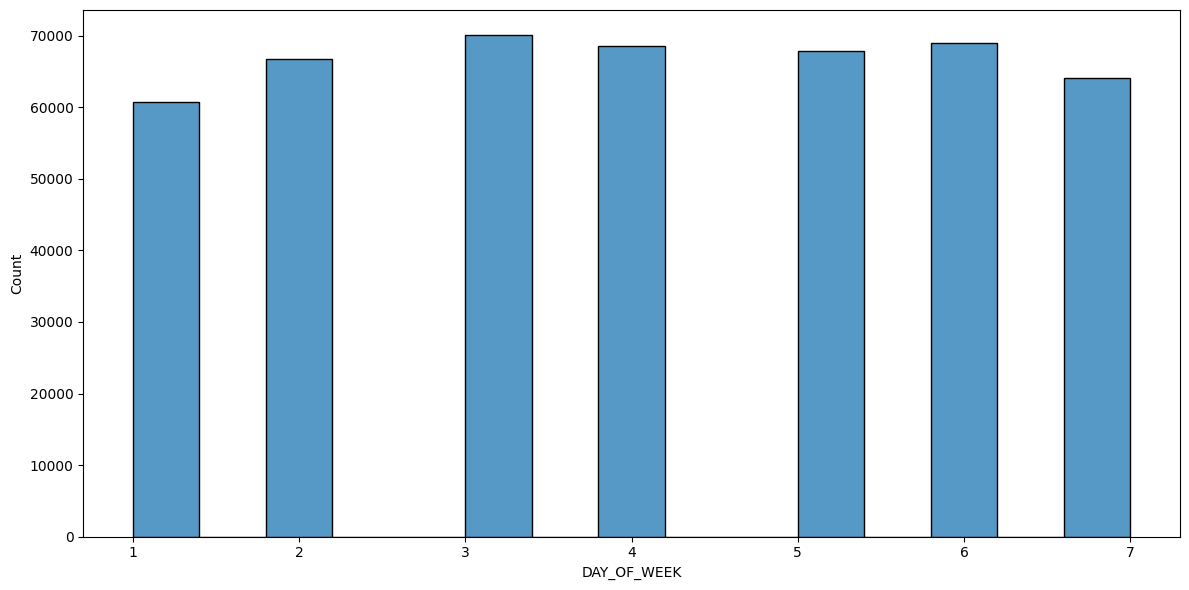

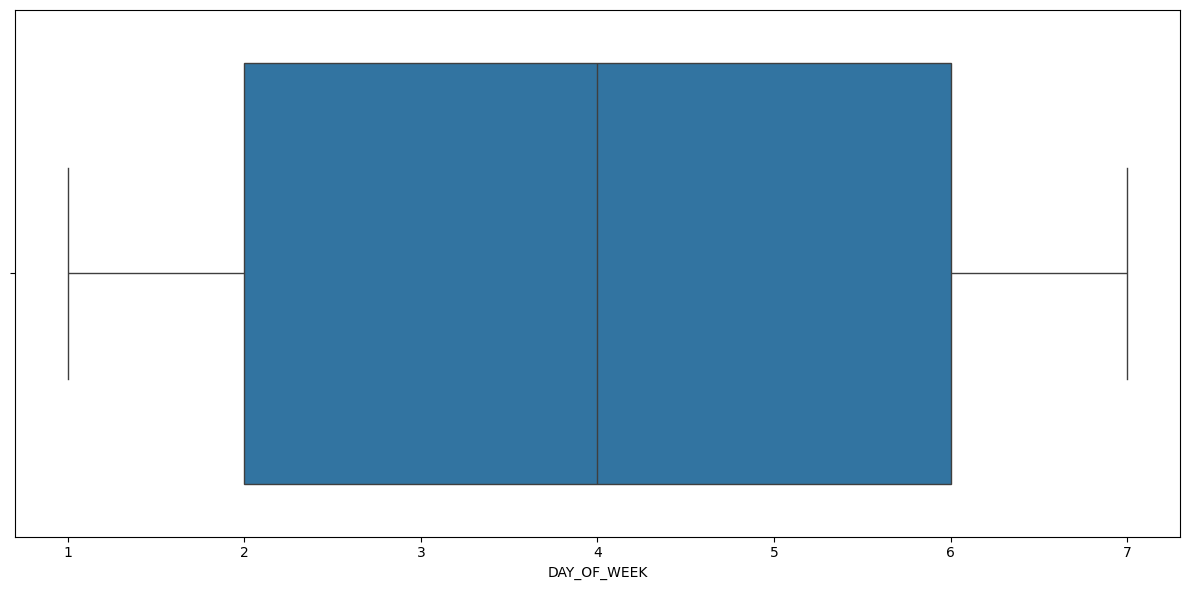

CALL_TYPE
SELENF    39210
415       37859
T         26394
CW        23612
459A      17589
MPSSTP    15223
1186      13321
415V      11654
5150      10973
586       10546
911       10467
1183       9286
415N       9251
1151       9087
MTG        7665
HZRD       7534
1016       7312
1185       7104
AU2        6877
602        6058
Name: count, dtype: int64

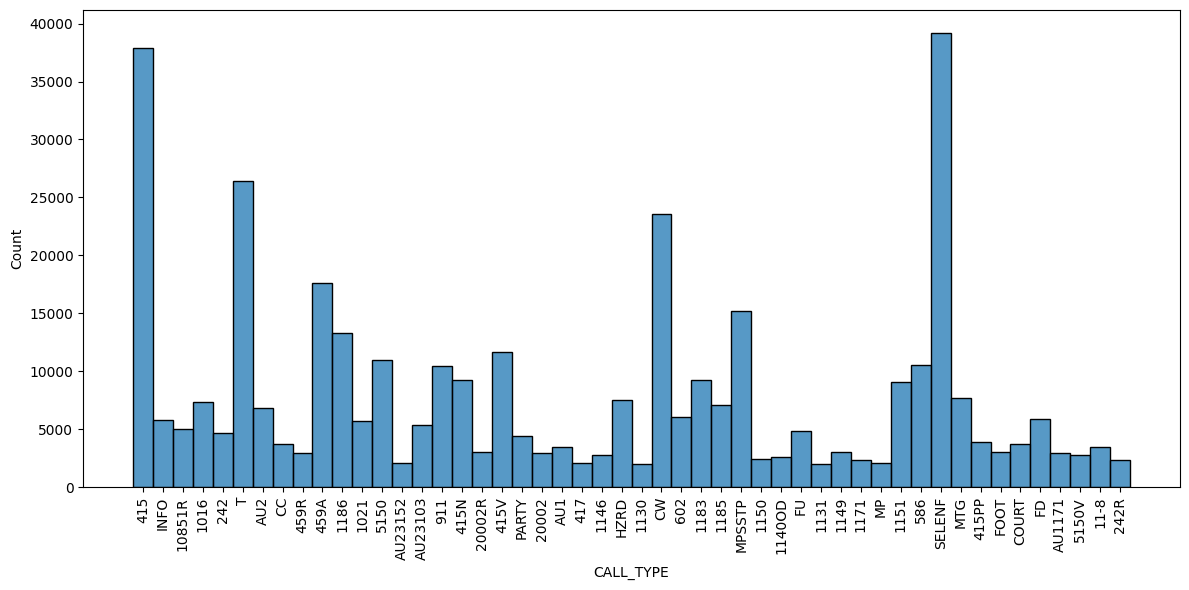

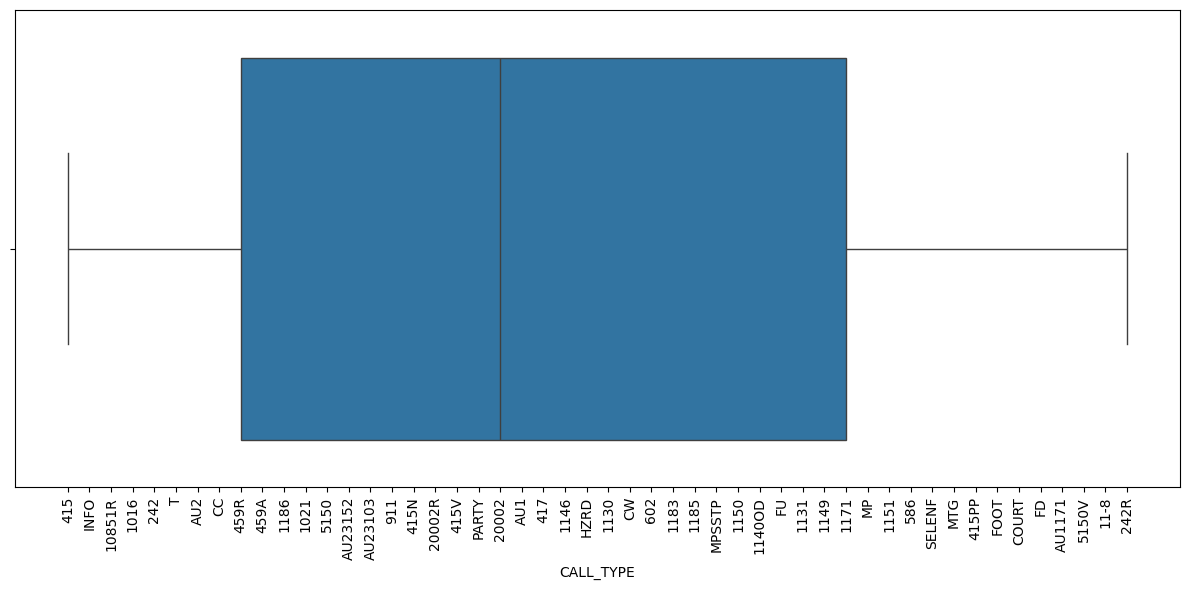

DISPOSITION
K      250059
O       69753
W       36876
CAN     36342
R       35378
A       19045
U        7902
DUP      7405
S        1151
X         599
KB         55
SS-        18
OHR        14
V          10
RB          7
RHR         4
KHR         4
AB          3
DEF         1
360         1
Name: count, dtype: int64

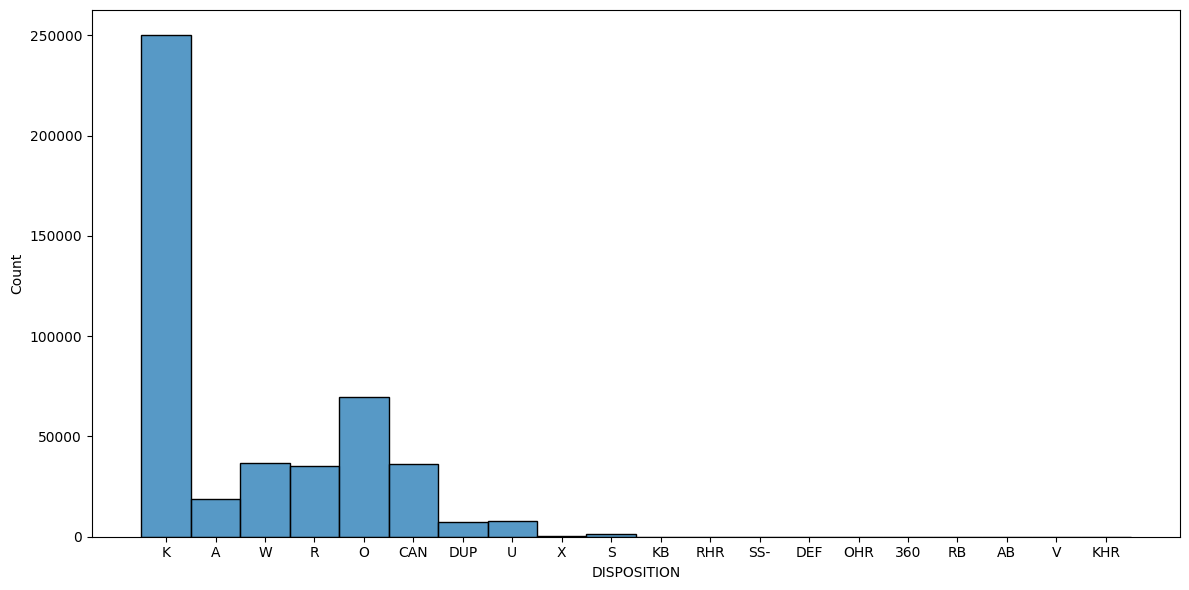

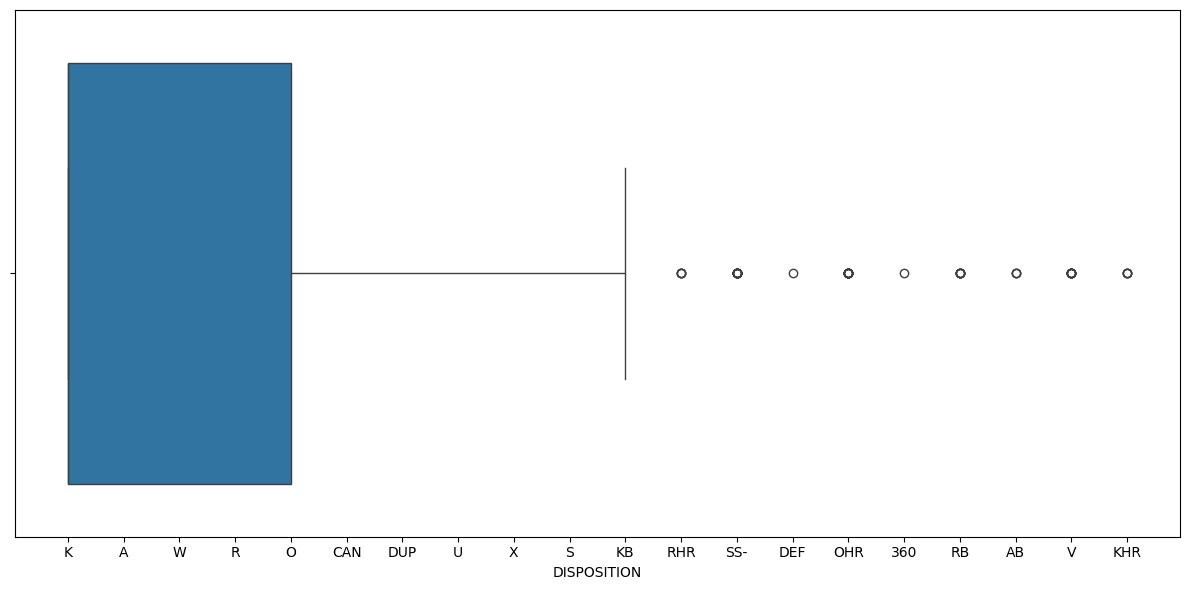

BEAT
 521    28989
 122    17084
 524    16704
 313    13615
 512    11575
 611    10073
 242    10066
 627     9854
 813     9799
 124     9556
 115     9174
 315     8900
-1       8735
 712     8535
 614     8358
 311     8245
 511     7625
 523     7373
 723     6720
 934     5786
Name: count, dtype: int64

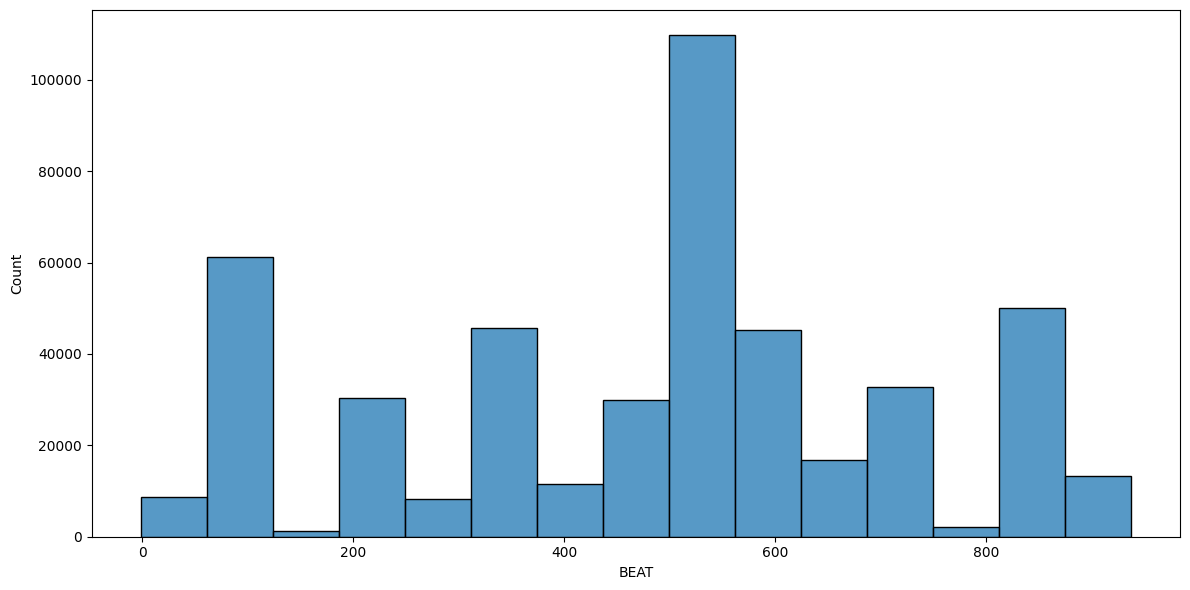

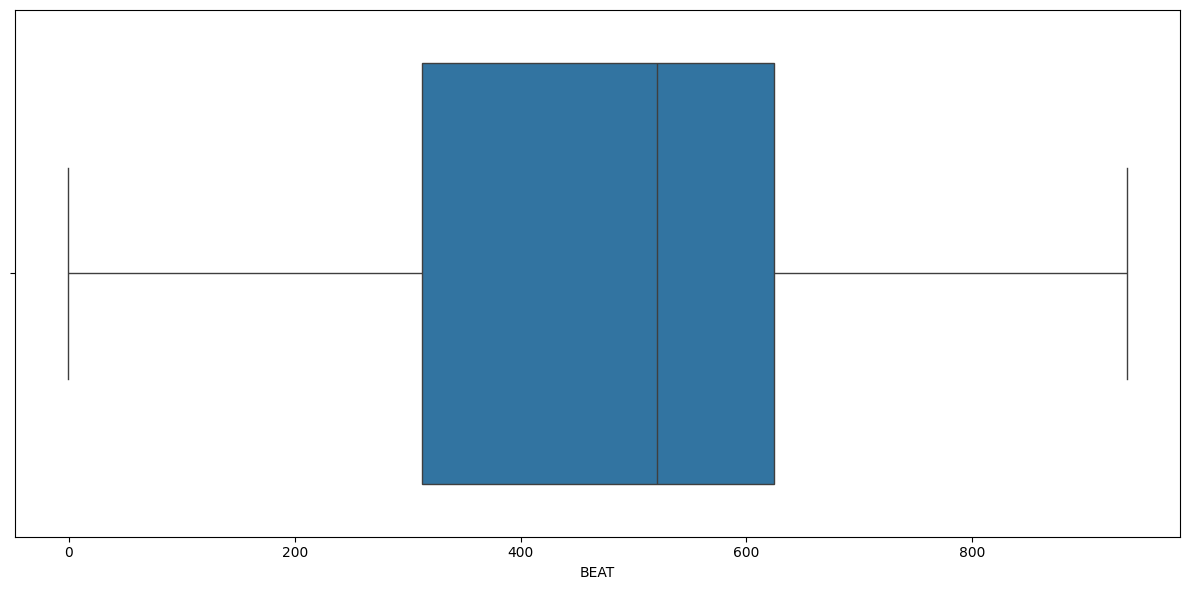

PRIORITY
2    207102
3    113876
1     91851
0     27613
4     23205
9      3328
7         2
5         1
Name: count, dtype: int64

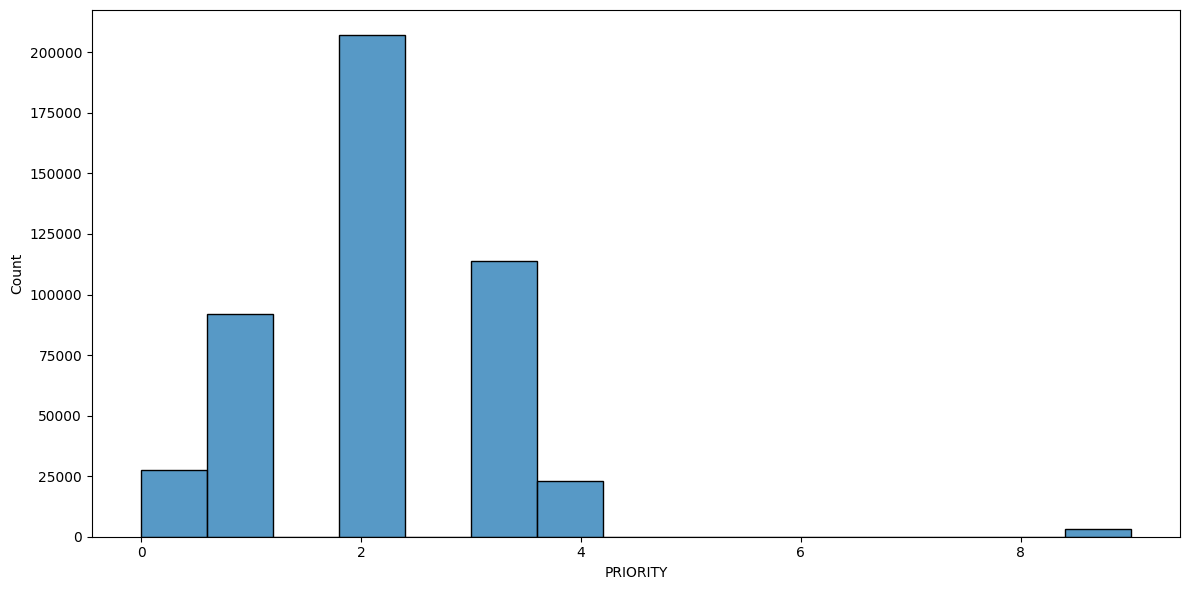

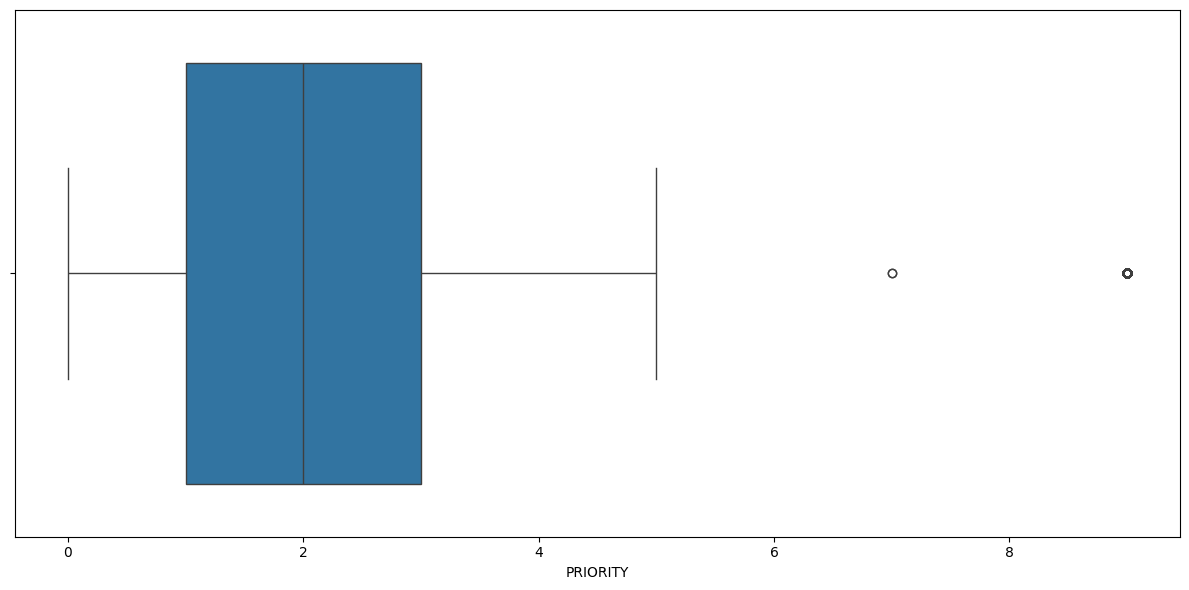

In [10]:
# Determine if there are any outliers or suspicious entries
print('-' * 48 + ' Determine if there are any outliers or suspicious entries  ' + '-' * 48 )

vars_of_interest = ['DAY_OF_WEEK', 'CALL_TYPE', 'DISPOSITION', 'BEAT', 'PRIORITY']
for var in vars_of_interest:
    if var == 'CALL_TYPE':
        # Top 10 value counts
        display(df[var].value_counts().nlargest(20))

        # Histogram
        plt.figure(figsize=(12, 6))
        top_cats = df['CALL_TYPE'].value_counts().nlargest(50).index
        sns.histplot(data=df[df['CALL_TYPE'].isin(top_cats)], x='CALL_TYPE')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        # Boxplot
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[df['CALL_TYPE'].isin(top_cats)], x='CALL_TYPE')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        # Top 10 value counts
        display(df[var].value_counts().nlargest(20))

        # Histogram
        plt.figure(figsize=(12, 6))
        sns.histplot(data=df, x=var, bins=15)
        plt.tight_layout()
        plt.show()

        # Boxplot
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=var)
        plt.tight_layout()
        plt.show()



In [11]:
# Clean the dataset
print('-' * 48 + ' Clean the dataset ' + '-' * 48 )
print(f'\nTotal observations before cleaning: {len(df)}\n')

# Remove intersecting street columns
df_cleaned = df.drop(labels=['ADDRESS_DIR_INTERSECTING', 'ADDRESS_ROAD_INTERSECTING', 'ADDRESS_SFX_INTERSECTING'], axis='columns')

# Remove any row with missing ADDRESS_ROAD_PRIMARY, CALL_TYPE, or DISPOSITION entries
df_cleaned = df_cleaned.dropna(subset=['ADDRESS_ROAD_PRIMARY', 'CALL_TYPE', 'DISPOSITION']).reset_index(drop=True)

df_cleaned.to_csv('data/01-processed/pd_calls_for_service_2025_datasd_cleaned.csv', index=False)
display(df_cleaned.head())
print(f'Total observations after cleaning: {len(df_cleaned)}\n')

------------------------------------------------ Clean the dataset ------------------------------------------------

Total observations before cleaning: 466978



,INCIDENT_NUM,DATE_TIME,DAY_OF_WEEK,ADDRESS_NUMBER_PRIMARY,ADDRESS_DIR_PRIMARY,ADDRESS_ROAD_PRIMARY,ADDRESS_SFX_PRIMARY,CALL_TYPE,DISPOSITION,BEAT,PRIORITY
0,E25120020309,2025-12-15 09:48:49,2,4200,NaN,03RD,AVE,487R,K,627,9
1,E25120025105,2025-12-18 16:32:13,5,5500,NaN,MILDRED,ST,10852R,K,622,9
2,E25120028508,2025-12-20 22:43:23,7,500,NaN,05TH,AVE,415,A,523,2
3,E25120028604,2025-12-21 00:02:05,1,0,NaN,SHOPS LOG,NaN,SHOPS,W,-1,4
4,E25120028605,2025-12-21 00:02:41,1,0,NaN,MCRT LOG,NaN,INFO,W,-1,2


Total observations after cleaning: 458035



--------------------------------------------- Visualize the dataset ---------------------------------------------



,count
DATE_TIME,
2025-01-10,2954
2025-01-07,2860
2025-01-09,2768
2025-01-08,2760
2025-01-11,2544


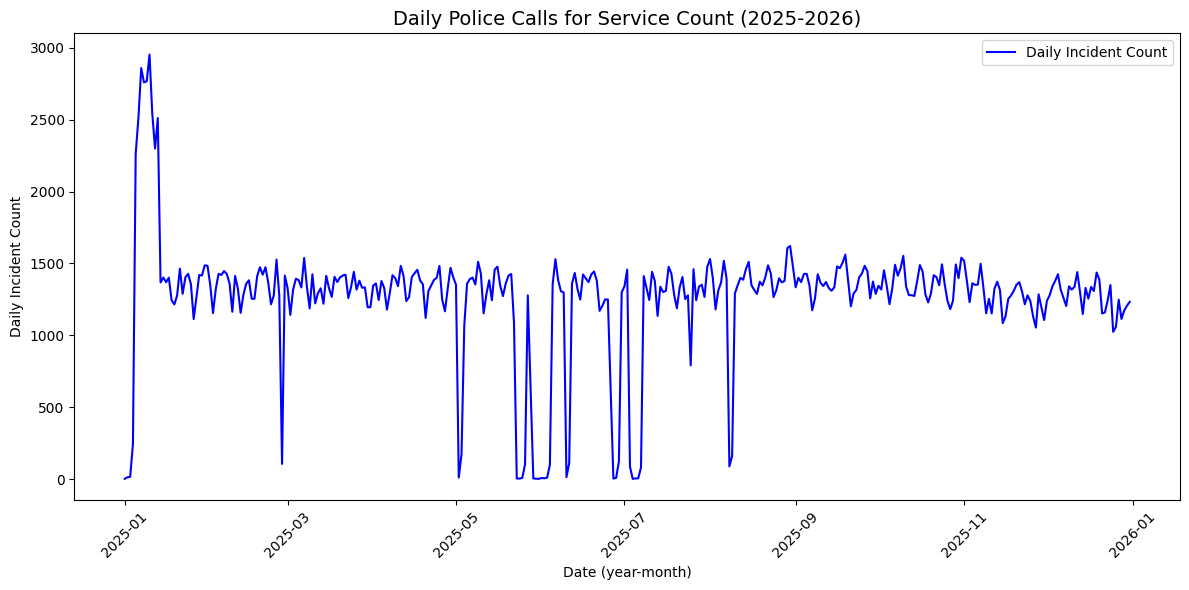

In [12]:
# Visualize the dataset
import geopandas as gpd
print('-' * 45 + ' Visualize the dataset ' + '-' * 45 + '\n')

# Time series plot of incident count
daily_incident_count_df = df_cleaned['DATE_TIME'].dt.date.value_counts().to_frame()
display(daily_incident_count_df.head())
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_incident_count_df, x='DATE_TIME', y='count', label='Daily Incident Count', color='blue', lw=1.5)
plt.title('Daily Police Calls for Service Count (2025-2026)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Daily Incident Count')
plt.xlabel('Date (year-month)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

,objectid,beat,div,serv,name,geometry,count
0,9,935,9,930,NORTH CITY,"POLYGON ((-117.23876 32.98575, -117.2387 32.98...",952
1,13,0,0,0,SAN DIEGO,"MULTIPOLYGON (((-117.22526 32.70267, -117.2252...",6
2,14,511,5,510,NaN,"MULTIPOLYGON (((-117.22529 32.7026, -117.22525...",7625
3,15,722,7,720,NESTOR,"POLYGON ((-117.09042 32.58382, -117.09001 32.5...",3216
4,16,314,3,310,BIRDLAND,"POLYGON ((-117.15149 32.8065, -117.1514 32.806...",2680


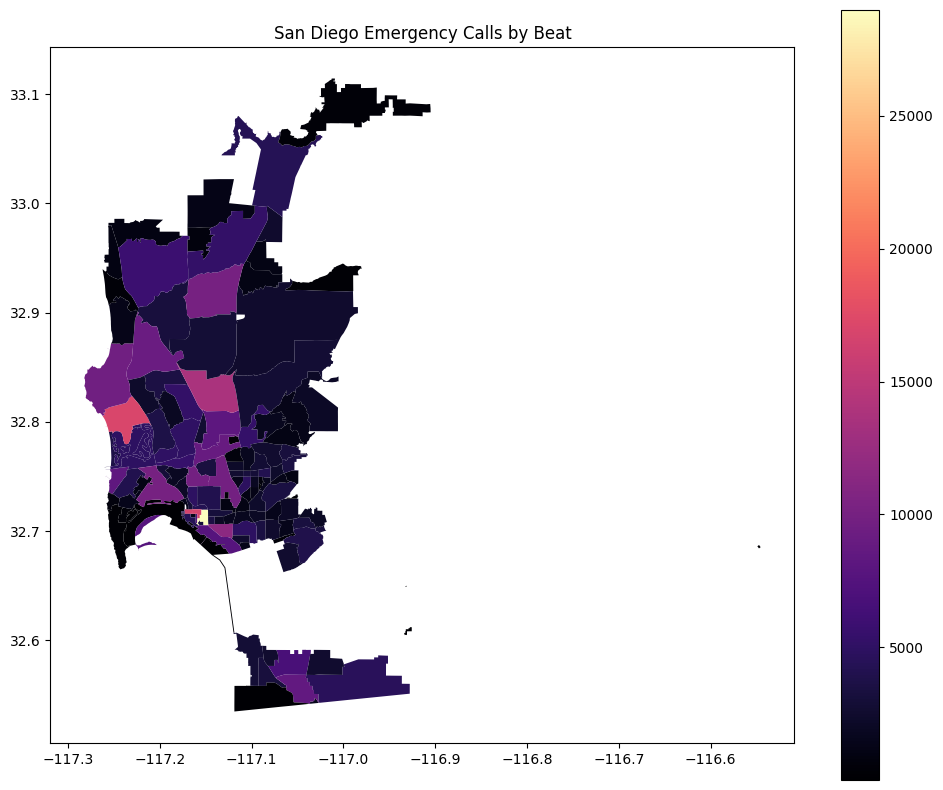

[-117.28234141   32.53477985 -116.54561292   33.1141959 ]


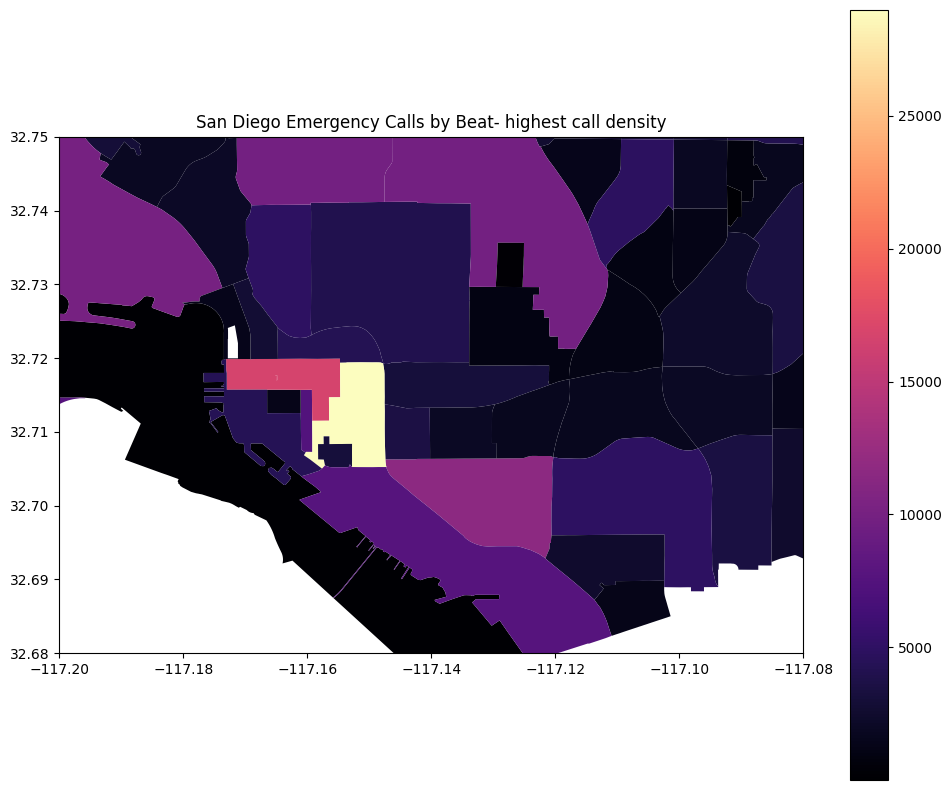

In [13]:
# Choropleth plot
SD_beats_df = gpd.GeoDataFrame.from_file('data/00-raw/pd_beats_datasd.geojson')
call_counts = df['BEAT'].value_counts().to_frame().reset_index()

call_counts = call_counts.rename(columns={'BEAT': 'beat'})
SD_beats_df = SD_beats_df.merge(call_counts, on='beat', how='left')
display(SD_beats_df.head())

SD_beats_df.plot(column='count', cmap='magma', legend=True, figsize=(12, 10))
plt.title('San Diego Emergency Calls by Beat')
plt.show()

SD_beats_df.plot(column='count', cmap='magma', legend=True, figsize=(12, 10))
print(SD_beats_df.total_bounds)
plt.xlim([-117.20, -117.08])
plt.ylim([32.68, 32.75])
plt.title('San Diego Emergency Calls by Beat- highest call density')
plt.show()

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from modules.main import (
    build_features_v2_from_processed,
    step3_hotspots,
    step3_baseline_forecast,
    step4_resource_deployment,
)

DATA_PROCESSED = 'data/01-processed/pd_calls_for_service_2025_datasd_cleaned.csv'
DATA_BEATS = 'data/00-raw/pd_beats_datasd.geojson'
OUT_DIR = 'data/01-processed'
os.makedirs(OUT_DIR, exist_ok=True)


In [ ]:
FEATURES_CSV = os.path.join(OUT_DIR, 'pd_calls_for_service_2025_datasd_features_v2.csv')
df_v2 = build_features_v2_from_processed(DATA_PROCESSED, out_csv=FEATURES_CSV)
df_v2.head()

,INCIDENT_NUM,DATE_TIME,DAY_OF_WEEK,ADDRESS_NUMBER_PRIMARY,ADDRESS_DIR_PRIMARY,ADDRESS_ROAD_PRIMARY,ADDRESS_SFX_PRIMARY,CALL_TYPE,DISPOSITION,BEAT,PRIORITY,DATETIME,DATE,HOUR,DOW,MONTH,SEASON,BEAT_KEY,IS_HIGH_RISK
0,E25120020309,2025-12-15 09:48:49,2,4200,NaN,03RD,AVE,487R,K,627,9,2025-12-15 09:48:49,2025-12-15,9,Monday,12,Winter,627,0
1,E25120025105,2025-12-18 16:32:13,5,5500,NaN,MILDRED,ST,10852R,K,622,9,2025-12-18 16:32:13,2025-12-18,16,Thursday,12,Winter,622,0
2,E25120028508,2025-12-20 22:43:23,7,500,NaN,05TH,AVE,415,A,523,2,2025-12-20 22:43:23,2025-12-20,22,Saturday,12,Winter,523,1
3,E25120028604,2025-12-21 00:02:05,1,0,NaN,SHOPS LOG,NaN,SHOPS,W,-1,4,2025-12-21 00:02:05,2025-12-21,0,Sunday,12,Winter,-1,0
4,E25120028605,2025-12-21 00:02:41,1,0,NaN,MCRT LOG,NaN,INFO,W,-1,2,2025-12-21 00:02:41,2025-12-21,0,Sunday,12,Winter,-1,1


## Step 3A: Hotspots (Beat-level + Season)

In [ ]:
# beats_gdf = gpd.read_file(DATA_BEATS)
# valid_beats = set(beats_gdf["beat"].astype(str))
# df_v2["BEAT_KEY"].astype(str).isin(valid_beats).mean()    #Check how much of the data has valid beats, and how much of the data has invalid beats by comparing with geojson(i.e. beat=-1)

np.float64(0.9814184505550886)

In [ ]:
# "-1" in valid_beats # okay, there is no beat=-1 inside geogson, but why in cleaned.csv, there are still some beat=-1? And even in raw csv?

False

In [ ]:
# "-1" in valid_beats
# df_v2["BEAT_KEY"].astype(str).value_counts().head(20)
# so there is really -1 beat in the data, which is not valid, and will cause issues in the modeling step, so we need to delete those rows with beat=-1

BEAT_KEY
521    28274
122    16653
524    15543
313    12921
512    11376
611     9975
242     9913
627     9742
813     9684
124     9407
115     9043
315     8793
-1      8511
712     8406
614     8177
311     8110
511     7521
523     7244
723     6620
934     5561
Name: count, dtype: int64

In [47]:
# df_v2 = df_v2[df_v2["BEAT_KEY"].astype(str) != "-1"].copy() #deleting rows with BEAT_KEY of -1 since those are not valid beats and will cause issues in the modeling step

beats_gdf = gpd.read_file(DATA_BEATS)
valid_beats = set(beats_gdf["beat"].astype(str).str.strip())

df_v2 = df_v2[df_v2["BEAT_KEY"].astype(str).str.strip().isin(valid_beats)].copy()
#deleting rows with BEAT_KEY of -1 or any other beats which aren't in a geojson since those are not valid beats and will cause issues in the modeling step


In [ ]:
beat_counts, beat_season = step3_hotspots(df_v2)
beat_counts.head(10)    #Now clear of beat=-1, and all beats are valid beats that are in geojson, so we can use them for modeling step without worrying about invalid beats causing issues in the modeling step.

,CALLS
BEAT_KEY,
521,28274
122,16653
524,15543
313,12921
512,11376
611,9975
242,9913
627,9742
813,9684


In [49]:
beat_season.head(10)

,BEAT_KEY,SEASON,CALLS
0,0,Fall,1
1,0,Spring,1
2,0,Summer,3
3,111,Fall,1355
4,111,Spring,1294
5,111,Summer,1195
6,111,Winter,1385
7,112,Fall,496
8,112,Spring,477
9,112,Summer,419


In [50]:
hotspot_path = os.path.join(OUT_DIR, 'step3_hotspots_beats.csv')
beat_counts.to_csv(hotspot_path)
beat_season.to_csv(os.path.join(OUT_DIR, 'step3_hotspots_beat_season.csv'), index=False)
hotspot_path

'data/01-processed\\step3_hotspots_beats.csv'

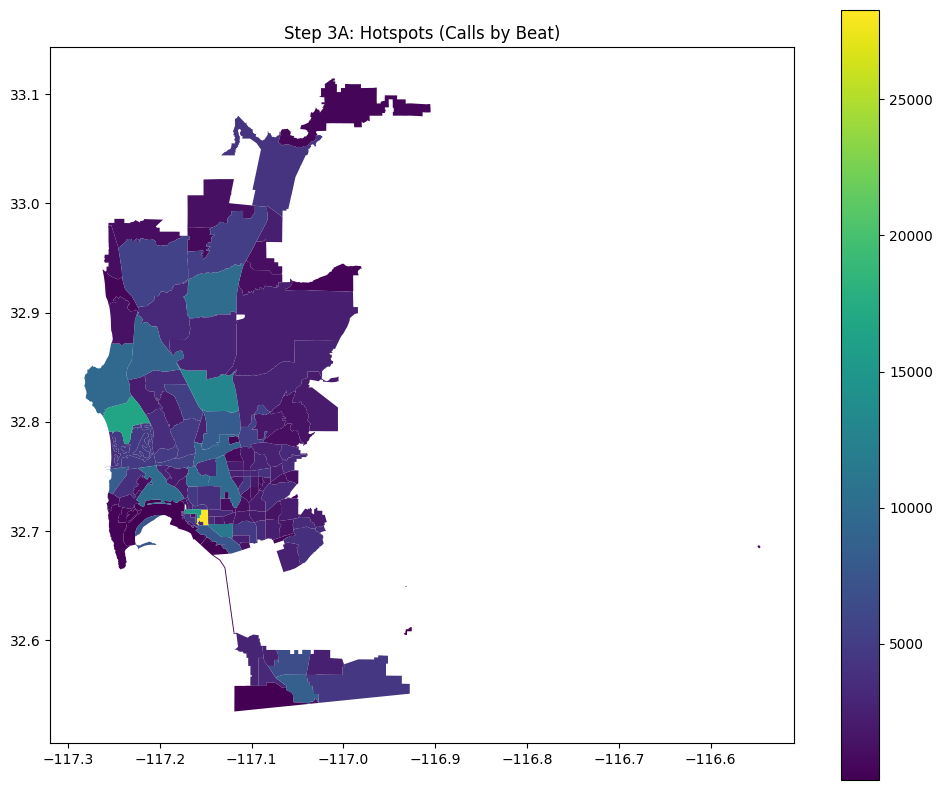

In [51]:
beats_gdf = gpd.GeoDataFrame.from_file(DATA_BEATS)

if "beat" in beats_gdf.columns:
    beats_gdf["beat"] = beats_gdf["beat"].astype(str).str.strip()
else:
    raise AssertionError("GeoJSON does not have a 'beat' column.")

counts_df = beat_counts.reset_index().rename(columns={"BEAT_KEY": "beat"})
counts_df["beat"] = counts_df["beat"].astype(str).str.strip()

beats_plot = beats_gdf.merge(counts_df, on="beat", how="left")
beats_plot["CALLS"] = beats_plot["CALLS"].fillna(0)

beats_plot.plot(column="CALLS", legend=True, figsize=(12, 10))
plt.title("Step 3A: Hotspots (Calls by Beat)")
plt.show()

## Step 3B: Baseline Forecasting (Beat × Hour × DOW)
- Baseline = average # call (BEAT, HOUR, DOW) during train
- Test = prediction vs real about recent(`test_days`)

In [52]:
pred_df, metrics = step3_baseline_forecast(df_v2, test_days=14)
metrics

{'MAE': 36.024867256637165, 'RMSE': 53.391803586931644, 'test_days': 14}

In [53]:
pred_df.head()

,DATE,BEAT_KEY,HOUR,DOW,ACTUAL_CALLS,MEAN_CALLS,PRED_CALLS
0,2025-12-18,111,9,Thursday,1,35.0,35.0
1,2025-12-18,111,10,Thursday,1,48.0,48.0
2,2025-12-18,111,11,Thursday,1,46.0,46.0
3,2025-12-18,111,12,Thursday,1,41.0,41.0
4,2025-12-18,111,13,Thursday,1,35.0,35.0


In [54]:
pred_path = os.path.join(OUT_DIR, 'step3_forecast_predictions.csv')
met_path = os.path.join(OUT_DIR, 'step3_forecast_metrics.csv')
pred_df.to_csv(pred_path, index=False)
pd.DataFrame([metrics]).to_csv(met_path, index=False)
(pred_path, met_path)

('data/01-processed\\step3_forecast_predictions.csv',
 'data/01-processed\\step3_forecast_metrics.csv')

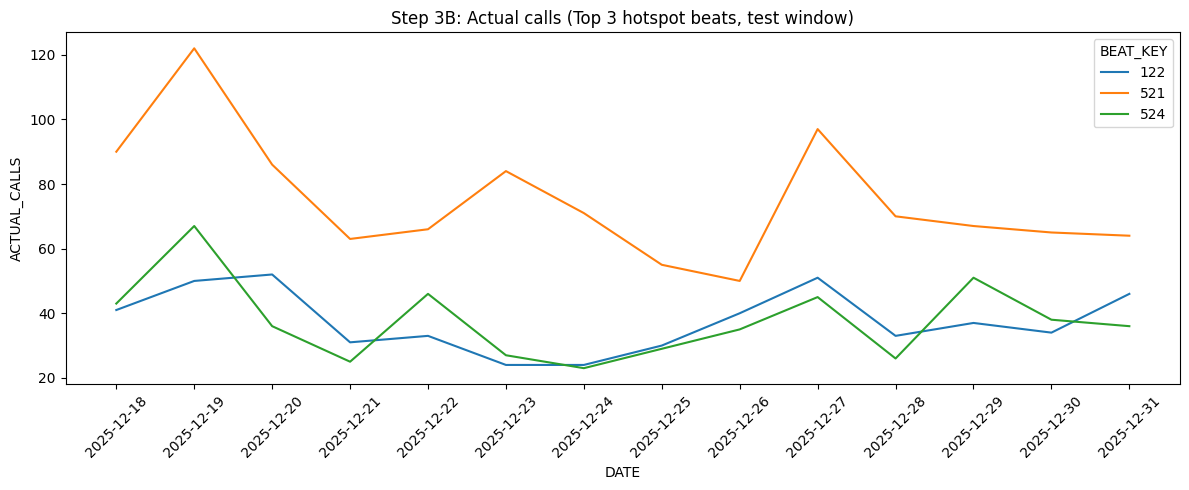

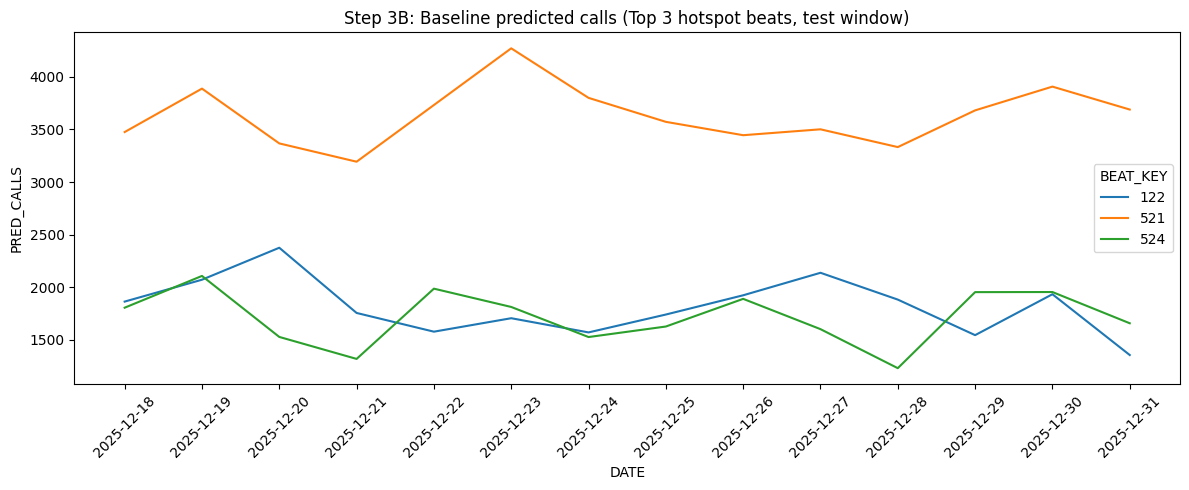

In [11]:
top_beats = list(beat_counts.head(3).index)
viz = pred_df[pred_df['BEAT_KEY'].isin(top_beats)].copy()
viz_agg = viz.groupby(['DATE','BEAT_KEY'])[['ACTUAL_CALLS','PRED_CALLS']].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=viz_agg, x='DATE', y='ACTUAL_CALLS', hue='BEAT_KEY', legend=True)
plt.xticks(rotation=45)
plt.title('Step 3B: Actual calls (Top 3 hotspot beats, test window)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(data=viz_agg, x='DATE', y='PRED_CALLS', hue='BEAT_KEY', legend=True)
plt.xticks(rotation=45)
plt.title('Step 3B: Baseline predicted calls (Top 3 hotspot beats, test window)')
plt.tight_layout()
plt.show()

## Step 4: Resource Deployment Suggestion (What-if)
- Estimate demand by beat (Night/Day/Evening)
- distribute the total number of units (`total_units`) proportionally.
- Reflect the high-risk ratio as a weight.

In [55]:
alloc_df = step4_resource_deployment(df_v2, total_units=50, high_risk_weight=1.5)
alloc_df.head()

,BEAT_KEY,AVG_CALLS,HIGH_RISK_RATIO,WEIGHTED_DEMAND,UNITS,SHIFT
0,0,1.000000,0.500000,1.250000,0,Night
1,111,3.140523,0.677419,4.204248,1,Night
2,112,1.784141,0.804938,2.502203,0,Night
3,113,1.828947,0.685851,2.456140,0,Night
4,114,2.503817,0.705793,3.387405,1,Night


In [56]:
alloc_path = os.path.join(OUT_DIR, 'step4_resource_deployment.csv')
alloc_df.to_csv(alloc_path, index=False)
alloc_path

'data/01-processed\\step4_resource_deployment.csv'

In [57]:
alloc_df.sort_values(['SHIFT','UNITS'], ascending=[True, False]).groupby('SHIFT').head(10)


,BEAT_KEY,AVG_CALLS,HIGH_RISK_RATIO,WEIGHTED_DEMAND,UNITS,SHIFT
187,521,40.955621,0.526981,51.747041,3,Day
135,122,18.203540,0.680117,24.393805,2,Day
151,313,18.850746,0.640063,24.883582,2,Day
190,524,20.889552,0.540869,26.538806,2,Day
128,111,6.761329,0.755139,9.314199,1,Day
131,114,4.607362,0.726365,6.280675,1,Day
132,115,11.571429,0.642233,15.287202,1,Day
133,116,4.521341,0.698584,6.100610,1,Day
136,123,6.264615,0.520629,7.895385,1,Day
137,124,12.608309,0.735938,17.247774,1,Day


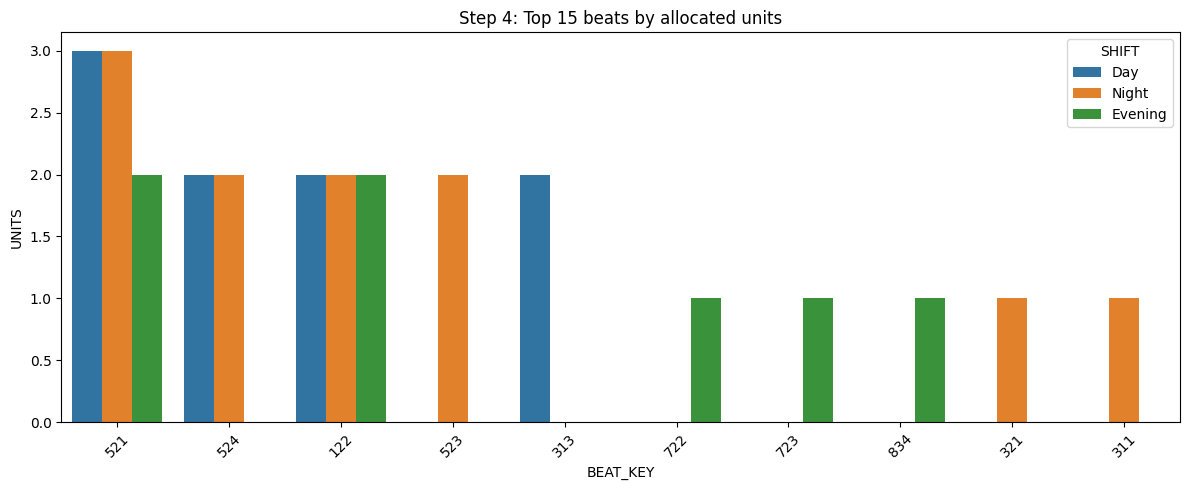

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(data=alloc_df.sort_values('UNITS', ascending=False).head(15), x='BEAT_KEY', y='UNITS', hue='SHIFT')
plt.xticks(rotation=45)
plt.title('Step 4: Top 15 beats by allocated units')
plt.tight_layout()
plt.show()
